I did not run this again when moving into the github repo for the paper so might need to update paths appropriately.

folder 2022_07_12_refine_afterbsearch with results is in magic-universalb, in clustersearch only the code that was used to run it in order to save space.

points_noneqav4.df is in the same folder as this notebook (copied from previous analysis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append('../../../work2/shared/utilsGRF')
sys.path.append("../bin")
import BoundaryFinder as BF
import AnalyseBoundarysearch
import pandas as pd

import N4av_noneq_25, N4av_noneq_100
from scipy.interpolate import interp1d

def plot_hillline(ax,nmax=1,colordict=None,textonly=0):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color="gray"
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=color,marker="x")
        if textonly==0:
            ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
        else:
            if textonly==n:
                ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

def get_x05(f,xvals):
    #first get midpoint
    min_=np.min(f)
    max_=np.max(f)
    midpoint=min_+0.5*(max_-min_)
    #print(f)
    #then get points around x05
    x05=xvals[np.where(f>=midpoint)[0][0]]
    return x05


def calculate_ps_fromnumerics_doublecheck_interpolate_100(pars=None,n1=75,n2=75,Hill=False,nH=2):
    
    xvals=np.logspace(-60,60,n1)
    f=np.zeros(n1)
    for x_ in range(n1):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(-60,60,100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    xvals=np.logspace(np.log10(0.0001*x05),np.log10(1000*x05),n2)
    #xvals=np.logspace(-3,3,n2)
    f=np.zeros(n2)
    for x_ in range(n2):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(np.log10(xvals.min()),np.log10(xvals.max()),100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    #print(x05)
    derivative=np.diff(fint)/np.diff(xint)
    argmax=np.argmax(np.abs(derivative))
    pos=xint[argmax]/x05
    stp=np.abs(derivative[argmax])*x05
    return [pos,stp,x05,xvals,f,xint,fint]

def calculate_ps_fromnumerics_doublecheck_interpolate_100_widerrange(pars=None,n1=75,n2=75,Hill=False,nH=2):
    #one order magnitude more before and after x05
    
    xvals=np.logspace(-60,60,n1)
    f=np.zeros(n1)
    for x_ in range(n1):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(-60,60,100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    xvals=np.logspace(np.log10(0.00001*x05),np.log10(10000*x05),n2)
    #xvals=np.logspace(-3,3,n2)
    f=np.zeros(n2)
    for x_ in range(n2):
        if Hill:
            f[x_]=(xvals[x_]**nH)/(1+xvals[x_]**nH)
        else:
            f[x_]=N4av_noneq_100.getGRFval(pars,xvals[x_])
    xint=np.logspace(np.log10(xvals.min()),np.log10(xvals.max()),100000)
    intfunc=interp1d(xvals,f)
    fint=intfunc(xint)
    x05=get_x05(fint,xint)
    #print(x05)
    derivative=np.diff(fint)/np.diff(xint)
    argmax=np.argmax(np.abs(derivative))
    pos=xint[argmax]/x05
    stp=np.abs(derivative[argmax])*x05
    return [pos,stp,x05,xvals,f,xint,fint]

In [5]:
n1=75
xvals=np.logspace(-60,60,n1)
print(len(xvals))
step=120/74.
print("step",step)
xvals2=np.array([10**(-60+step*k) for k in range(0,75)])
print(xvals[0:5],xvals[-5:])
print(xvals2[0:5],xvals2[-5:])


75
step 1.6216216216216217
[1.00000000e-60 4.18428851e-59 1.75082703e-57 7.32596543e-56
 3.06539530e-54] [3.26222201e+53 1.36500781e+55 5.71158648e+56 2.38989257e+58
 1.00000000e+60]
[1.00000000e-60 4.18428851e-59 1.75082703e-57 7.32596543e-56
 3.06539530e-54] [3.26222201e+53 1.36500781e+55 5.71158648e+56 2.38989257e+58
 1.00000000e+60]


In [7]:
n1=10**5
xvals=np.logspace(-60,60,n1)
print(len(xvals))
step=120/(n1-1)
print("step",step)
xvals2=np.array([10**(-60+step*k) for k in range(0,n1)])
print(range(n1)[-1])
print(xvals[0:5],xvals[-5:])
print(xvals2[0:5],xvals2[-5:])

100000
step 0.001200012000120001
99999
[1.00000000e-60 1.00276695e-60 1.00554156e-60 1.00832384e-60
 1.01111382e-60] [9.89008336e+59 9.91744873e+59 9.94488982e+59 9.97240684e+59
 1.00000000e+60]
[1.00000000e-60 1.00276695e-60 1.00554156e-60 1.00832384e-60
 1.01111382e-60] [9.89008336e+59 9.91744873e+59 9.94488982e+59 9.97240684e+59
 1.00000000e+60]


Read results from cluster refinement:

In [ ]:
#done with calculate_ps_fromnumerics_doublecheck_interpolate_100
#arguments were: (pars,n1=75,n2=1000)

In [2]:
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_07_12_refine_afterbsearch"
files=[x for x in os.listdir(folder) if x.startswith("out")]
print(len(files))
allpars=[]
allxvals=[]
allfvals=[]
allresults=[]
for f in files:
    fullf=os.path.join(folder,f)
    fh=open(fullf,"r")
    lines=fh.readlines()
    lines=[np.array(list(map(float,x.split(",")))) for x in lines]
    pars=lines[0]
    result=lines[1]
    xvals=lines[2]
    fvals=lines[3]
    allpars.append(pars)
    allxvals.append(xvals)
    allfvals.append(fvals)
    allresults.append(result)
    
    
        

13319


In [3]:
allresults=np.vstack(allresults)
allpos=allresults[:,0]
allstp=allresults[:,1]

In [4]:
print(np.min(allpos),np.max(allpos),np.min(allstp),np.max(allstp))

8.19406e-05 1.0678 0.798677 90.3296


In [5]:
name_ashape="ashape_N4univ" 
date="2022_1_2"  #substitute by the new one with all region covered, N4univ_allregion_10_10_stitched_2022_8_23.npy
plim=3
foldernew="./ashapes"   
ashape=np.load(os.path.join(foldernew,"%s_%d_%s.npy"%(name_ashape,plim,date)))


In [7]:
posar=np.arange(0.7,1.05,0.001)
stpar=np.arange(0.8,1.2,0.001)
mat=np.zeros((len(stpar),len(posar)))
for i in range(len(allresults)):
    posi=allpos[i]
    stpi=allstp[i]
    if posi>posar[0] and posi<posar[-1] and stpi>stpar[0] and stpi<stpar[-1]:
        idxpos=np.where(posi>=posar)[0][-1]
        idxstp=np.where(stpi>=stpar)[0][-1]
        mat[idxstp,idxpos]=1

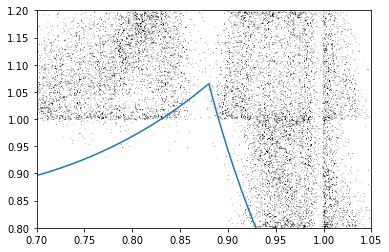

In [8]:
plt.imshow(mat,origin="lower",aspect="auto",cmap=plt.cm.Greys,extent=[posar[0],posar[-1],stpar[0],stpar[-1]])
plt.plot(ashape[0],ashape[1])

#plt.scatter(pos,stp,color="k")
plt.xlim(0.7,1.05)
plt.ylim(0.8,1.2)
plt.show()


In [9]:
np.random.seed(1)
choice=25
idxs=np.random.choice(range(len(allresults)),size=choice,replace=False)
idxs

array([ 5854,  7124,  8528, 11109,  8180,  7455,  8406,  5596, 10710,
        7011,  2226,  2809,  7911,  2255, 13225,  8805,  5818,   209,
        5282, 13174,  8177, 12264,  7477,  7042,  9005])

5854 : 0.824004 1.003 0.8251998979470292 1.0030684018360687


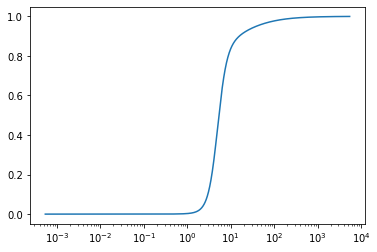

7124 : 0.782076 1.10089 0.793887561585805 1.1010481510892574


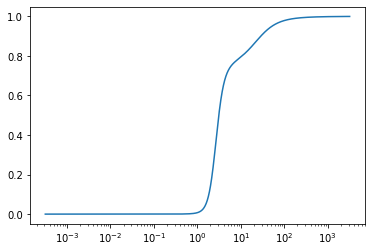

8528 : 0.969683 0.864912 0.9723438646278693 0.8649724557880503


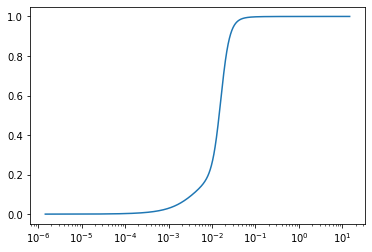

11109 : 0.840097 1.07503 0.8441687367406505 1.0748989705970664


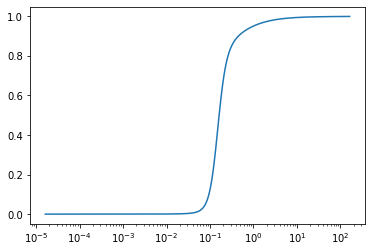

8180 : 0.705762 1.0292 0.7256022270106051 1.0059312032039351


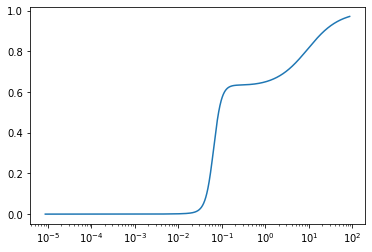

7455 : 0.895178 1.05402 0.8861341524385128 1.0542572530207195


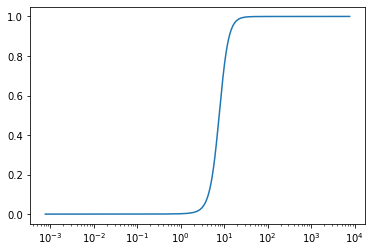

8406 : 1.02861 0.829203 1.0206811373844076 0.8292737475758145


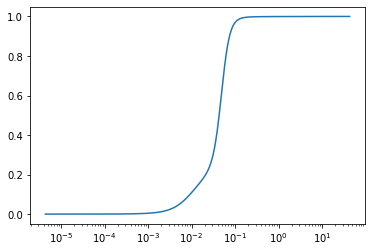

5596 : 0.955564 1.08522 0.9508013307474185 1.085520398335835


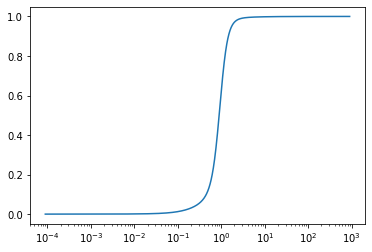

10710 : 0.803154 1.02753 0.812136624889674 1.0274057456109993


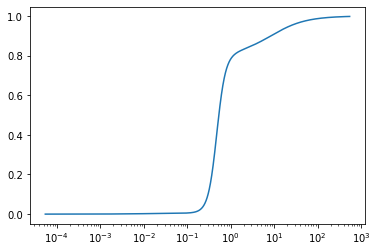

7011 : 1.02035 0.926832 1.0322624698390446 0.9272868704867745


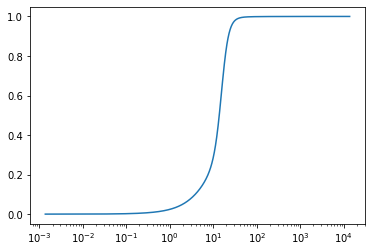

2226 : 0.917529 1.06005 0.9091375302119289 1.0600575570367097


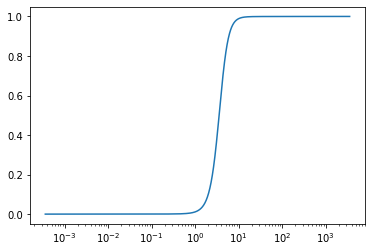

2809 : 1.00469 0.935277 1.010531941480413 0.9356194476680237


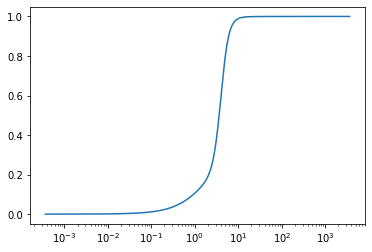

7911 : 0.765365 1.02359 0.7757984319920375 1.0233843758589893


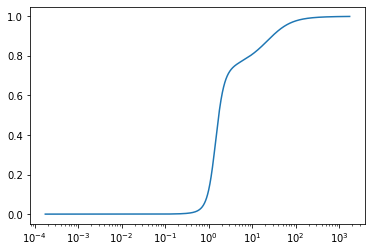

KeyboardInterrupt: 

In [18]:
for idx in idxs:
    posi=pos[idx]
    stpi=stp[idx]
    if posi>posar[0] and posi<posar[-1] and stpi>stpar[0] and stpi<stpar[-1]:
        parset=allpars[idx]
        result2=calculate_ps_fromnumerics_doublecheck_interpolate_100(parset,n1=1000,n2=2000)
            
        pos2,stp2,x05,xvals,f,xint,fint=result2
        print(idx,":",posi,stpi,pos2,stp2)
        plt.plot(xvals,f)
        plt.xscale("log")
        plt.show()
        

This above shows that the results of the refinement are accurate, and that going from n1=75,n2=1000 to n1=1000, n2=2000 there doesn't seem to be a change.

In [38]:
#now bin the points in bins, so that then we can select a sample that is uniformly distributed
newposar=np.arange(0.7,1.05,0.01)
newstpar=np.arange(0.8,1.2,0.01)
bins=[]
parsets_bins=[]
pos_bins=[]
stp_bins=[]

for i in range(len(allresults)):
    posi=allpos[i]
    stpi=allstp[i]
    parset=allpars[i]
    if posi>newposar[0] and posi<newposar[-1] and stpi>newstpar[0] and stpi<newstpar[-1]:
        idxpos=np.where(posi>=newposar)[0][-1]
        idxstp=np.where(stpi>=newstpar)[0][-1]
        bin_str="%d-%d"%(idxpos,idxstp)
        bins.append(bin_str)
        parsets_bins.append(parset)
        pos_bins.append(posi)
        stp_bins.append(stpi)
bins=np.array(bins)  

In [39]:
#now pick one point per bin

In [40]:
unique_bins=np.unique(bins)
print(len(allresults),len(unique_bins))

13319 955


In [41]:
selected_points=[]
for bin_ in unique_bins:
    bins_match=np.where(bins==bin_)[0]
    
    #pick the first one, it shouldn't really matter
    idx=bins_match[0]
    parset=parsets_bins[idx]
    pos=pos_bins[idx]
    stp=stp_bins[idx]
    selected_points.append([pos,stp]+list(parset))
    

In [42]:
plist=["p%d"%i for i in range(len(parset))]
df=pd.DataFrame(data=selected_points,columns=["pos","stp"]+plist)

In [43]:
df.head()

,pos,stp,p0,p1,p2,p3,p4,p5,p6,p7,...,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63
0,0.708955,0.997399,138.017549,1000.000000,0.001000,7.858547,0.002070,77.213543,0.001387,0.001000,...,0.001125,33.771345,0.003448,0.001000,1.456769,35.501909,6.608102,0.003974,0.00100,0.001000
1,0.701905,1.001920,0.002010,1.572062,0.001000,0.001000,0.001138,0.003599,2.222540,1000.000000,...,0.001081,0.027584,0.001000,0.001764,0.843593,0.003217,1000.000000,2.553827,1000.00000,0.001820
2,0.706559,1.014240,155.997493,1000.000000,0.001000,17.252584,0.005556,631.293229,0.002259,0.003014,...,0.001000,16.621547,0.003220,0.002726,0.190953,8.945968,3.507249,0.213339,0.00100,0.011362
3,0.709755,1.022790,0.002205,5.534273,0.001319,0.001000,0.001000,0.001000,8.875053,391.426132,...,0.009233,0.012454,0.002481,0.001000,0.001000,0.001000,1000.000000,2.412998,832.77916,0.061145
4,0.707015,1.030390,190.520503,1000.000000,0.003402,8.125383,0.001000,631.293229,0.001000,0.003014,...,0.001077,0.001000,0.003220,0.005801,1.456769,4.209702,0.976990,0.073158,0.00100,0.001000


In [44]:
len(df)

955

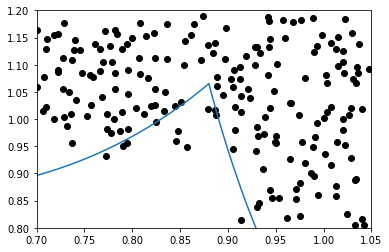

In [49]:
plt.plot(ashape[0],ashape[1])
np.random.seed(1)
idxs=np.random.choice(np.arange(len(df)),replace=False,size=200)
plt.scatter(df["pos"].values[idxs],df["stp"].values[idxs],color="k")
plt.xlim(0.7,1.05)
plt.ylim(0.8,1.2)
plt.show()


#Now doublecheck the points with position>0.9 and steepness > 1 (I checked around 100 out of the 200 and looked good, leaving only these ones):

ok 0.944082 1.01996 ; 0.9397227263348971 1.019991384804044
0.9397227263348971 1.019991384804044 ; 0.9319723455225265 1.0199913848038142


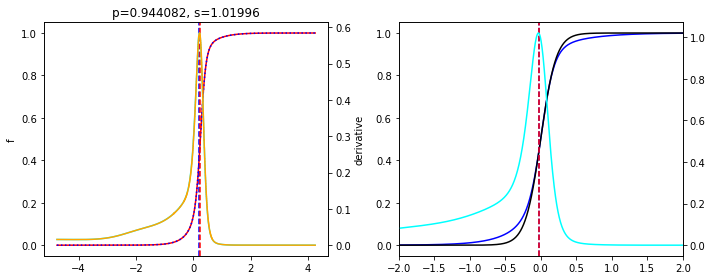

ok 1.0371 1.13828 ; 1.0326428432538648 1.1383093983944088
1.0326428432538648 1.1383093983944088 ; 1.0280056762010765 1.1383093983939834


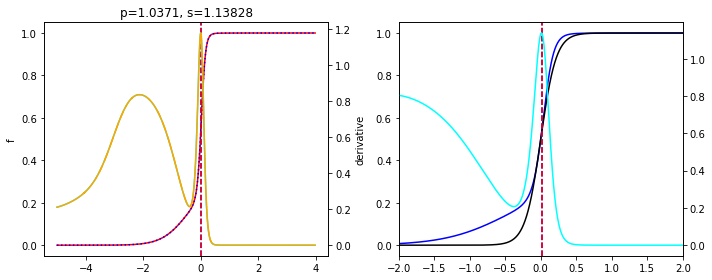

ok 1.00777 1.13979 ; 1.0097876208377174 1.139993901748899
1.0097876208377174 1.139993901748899 ; 1.0029539504158511 1.1399939017484608


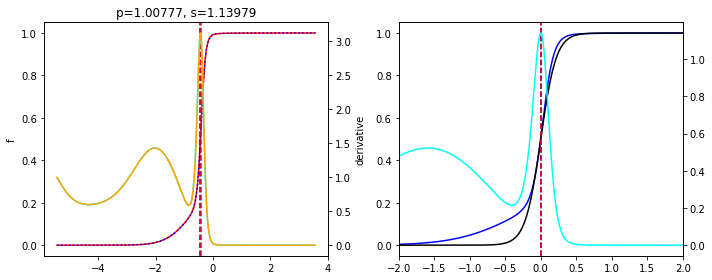

ok 1.03027 1.07339 ; 1.0287980284167513 1.0734902431812479
1.0287980284167513 1.0734902431812479 ; 1.0231174500450804 1.0734902431807778


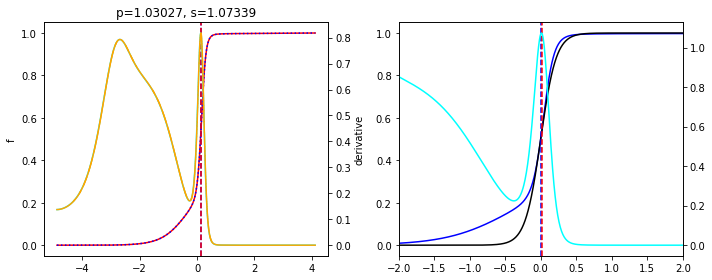

ok 0.989099 1.18525 ; 0.9843735405998439 1.1856581817990126
0.9843735405998439 1.1856581817990126 ; 0.9837992731293357 1.1856581817987621


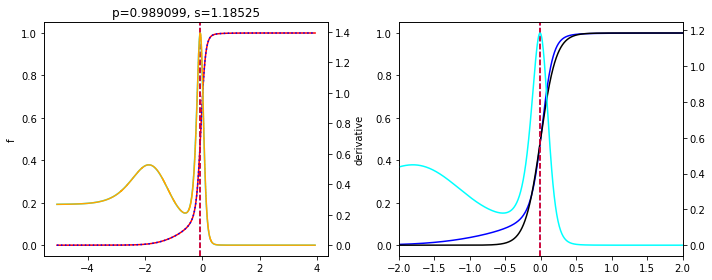

* 677 1.00323 1.06614 1.0108344784356131e-05 1.3045079495191108
1.0108344784356131e-05 1.3045079495191108 ; 1.0022821822604501e-05 1.3045079495184222


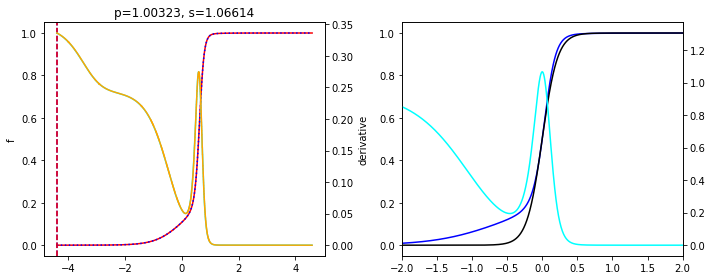

ok 0.913692 1.04266 ; 0.9136073978948787 1.042626766464314
0.9136073978948787 1.042626766464314 ; 0.9124698464684111 1.0426267664641318


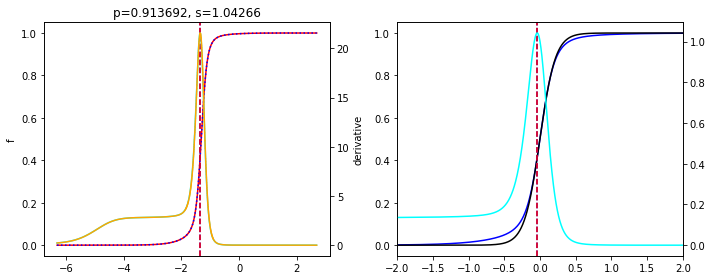

ok 1.0151 1.15114 ; 1.0173492627569538 1.1514390001575672
1.0173492627569538 1.1514390001575672 ; 1.0102550378018438 1.1514390001571229


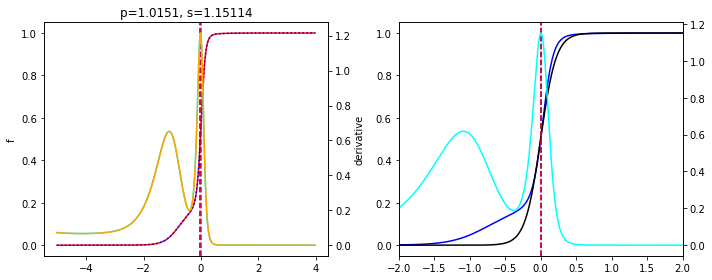

ok 1.02861 1.01975 ; 1.0273066916003524 1.0196846423481196
1.0273066916003524 1.0196846423481196 ; 1.0224815713220397 1.01968464234774


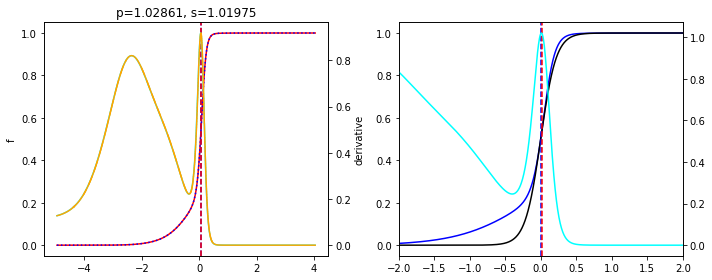

* 672 1.00404 1.01371 0.9915393703344978 1.0138140412302705
0.9915393703344978 1.0138140412302705 ; 0.989524433964363 1.0138140412300785


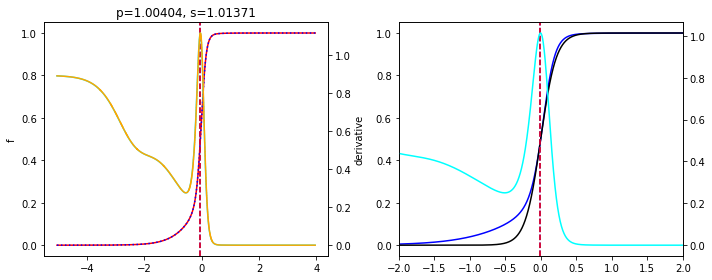

* 268 0.906358 1.0899 0.8891386513851115 1.090094190992641
0.8891386513851115 1.090094190992641 ; 0.8882065926994025 1.0900941909924158


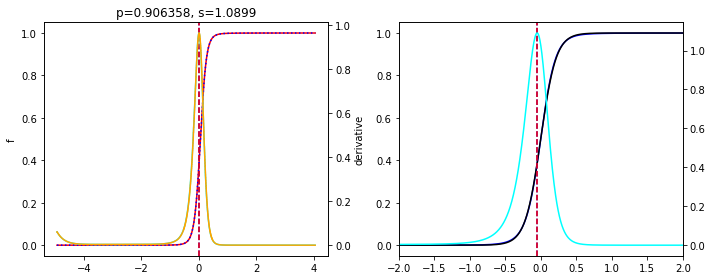

ok 0.942865 1.17957 ; 0.9397227263348972 1.1796400972184593
0.9397227263348972 1.1796400972184593 ; 0.934680190272275 1.1796400972182213


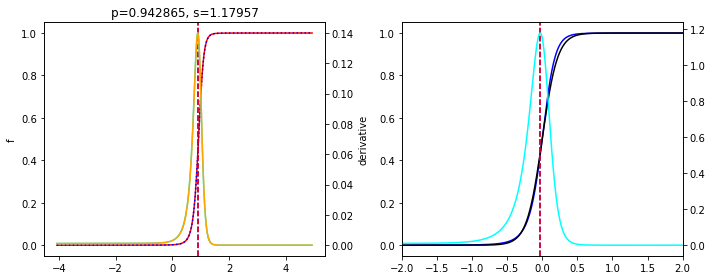

ok 0.943169 1.13301 ; 0.9424530898086099 1.1330597292376434
0.9424530898086099 1.1330597292376434 ; 0.9331318884942176 1.1330597292374707


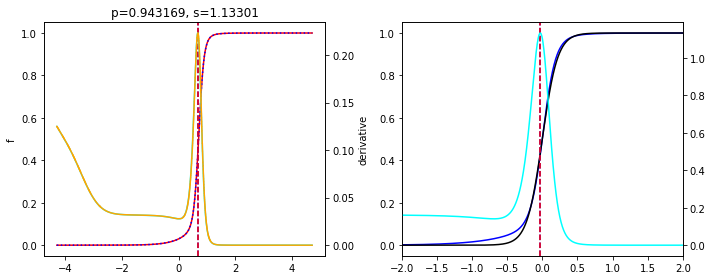

ok 1.02249 1.1838 ; 1.0177710103526931 1.1840266135975137
1.0177710103526931 1.1840266135975137 ; 1.011302379975892 1.1840266135971407


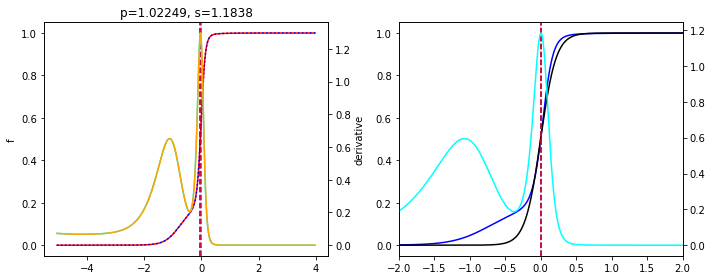

ok 1.02977 1.15842 ; 1.0245427991735303 1.1585248379288384
1.0245427991735303 1.1585248379288384 ; 1.019302923021947 1.1585248379283615


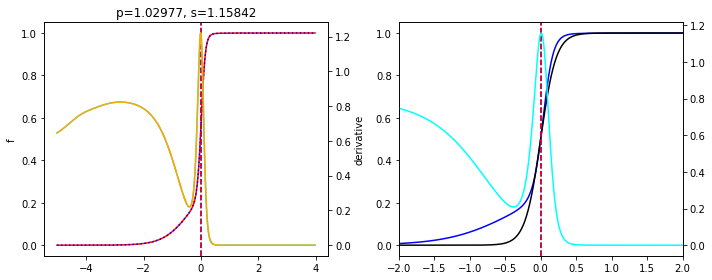

ok 1.02646 1.00795 ; 1.030932265917415 1.0085552099466852
1.030932265917415 1.0085552099466852 ; 1.0286449903510773 1.0085552099463124


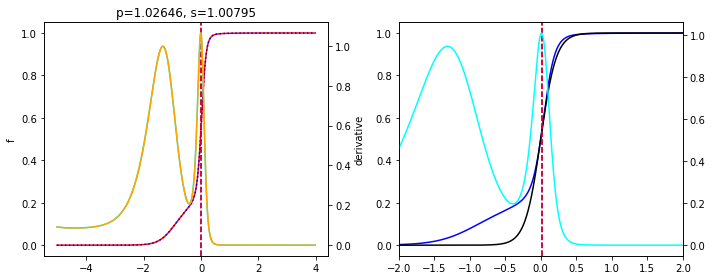

ok 0.912514 1.09605 ; 0.909263142136285 1.0960982538319723
0.909263142136285 1.0960982538319723 ; 0.903059302138586 1.096098253831698


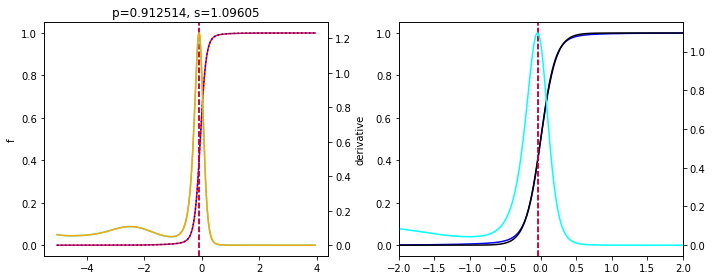

ok 0.990376 1.1243 ; 0.9847816179330207 1.1246737384986445
0.9847816179330207 1.1246737384986445 ; 0.979522175152149 1.1246737384984047


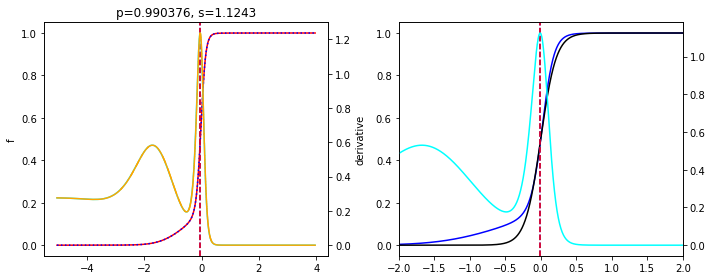

ok 1.00064 1.00124 ; 1.0002072562053173 1.0011162741668977
1.0002072562053173 1.0011162741668977 ; 0.9936392690473355 1.001116274166462


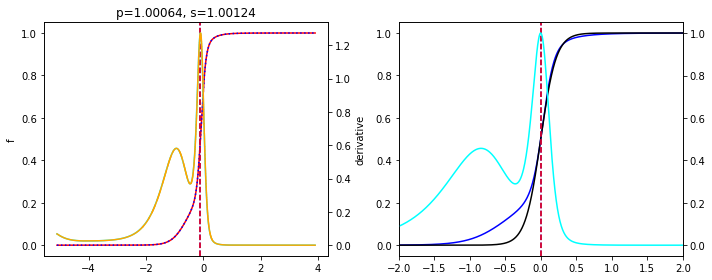

ok 0.965628 1.03041 ; 0.9703979479927436 1.0303043783501542
0.9703979479927436 1.0303043783501542 ; 0.9614125324876043 1.0303043783498942


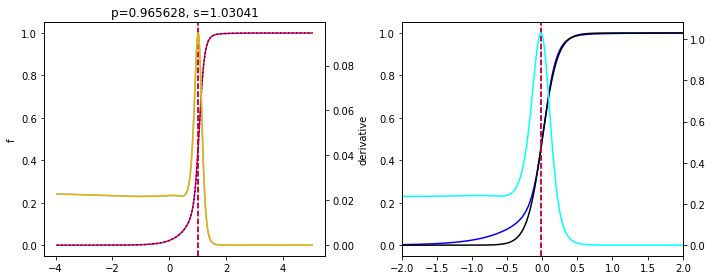

ok 1.00728 1.02142 ; 1.000414555365769 1.0211484385122511
1.000414555365769 1.0211484385122511 ; 0.993433373816043 1.0211484385119793


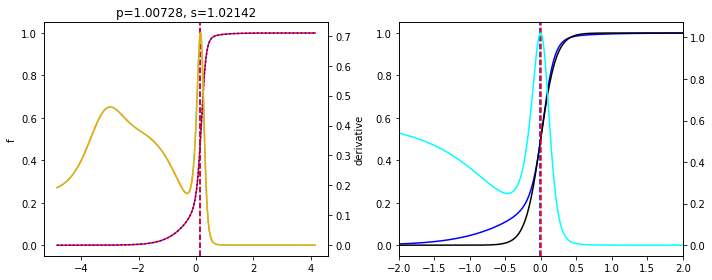

ok 0.913986 1.01263 ; 0.9236972598656105 1.0127630103773777
0.9236972598656105 1.0127630103773777 ; 0.91740425726961 1.0127630103771486


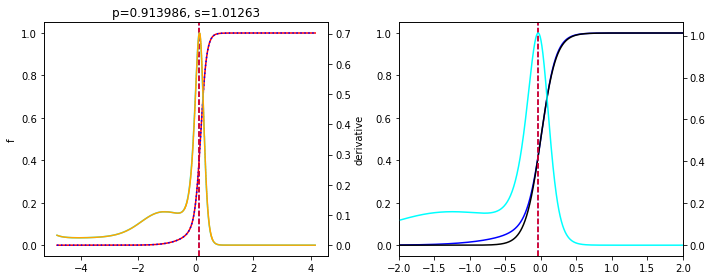

ok 0.951721 1.10217 ; 0.9432346497457043 1.1024117244244478
0.9432346497457043 1.1024117244244478 ; 0.9340992762767083 1.1024117244242302


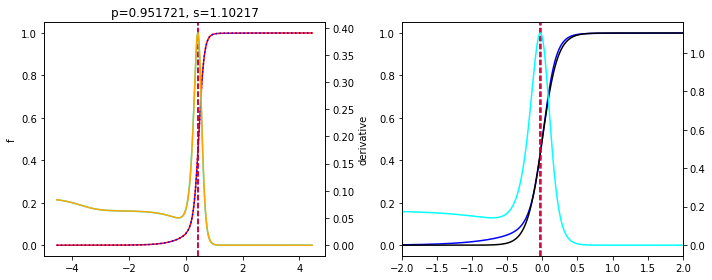

ok 1.02002 1.12438 ; 1.0106250201289424 1.1247691013803907
1.0106250201289424 1.1247691013803907 ; 1.003161818845722 1.124769101380009


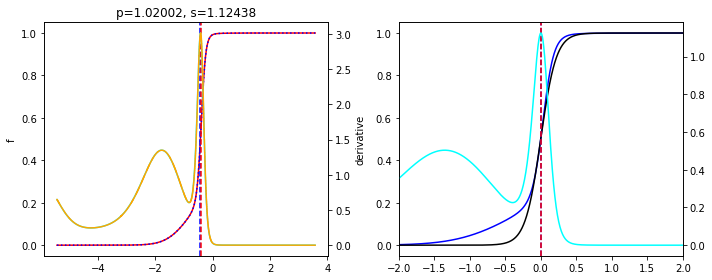

ok 0.928688 1.13287 ; 0.9261891029230972 1.132942249478431
0.9261891029230972 1.132942249478431 ; 0.9250452837813359 1.1329422494782249


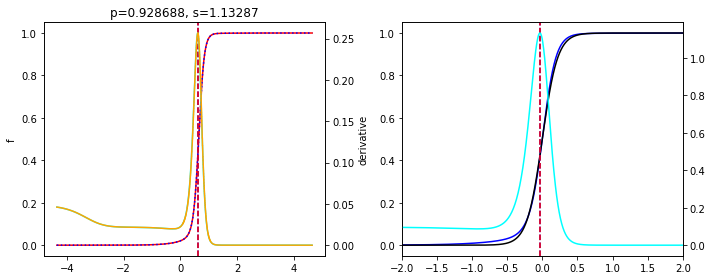

ok 0.976585 1.183 ; 0.980098924661799 1.182991993867638
0.980098924661799 1.182991993867638 ; 0.9744605229955136 1.1829919938674065


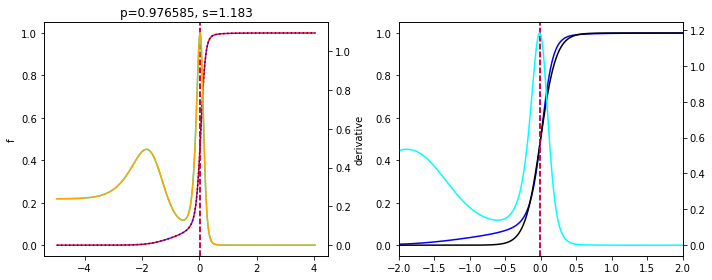

ok 0.974383 1.0083 ; 0.9786781816493841 1.008426250044566
0.9786781816493841 1.008426250044566 ; 0.9728463249242337 1.0084262500443362


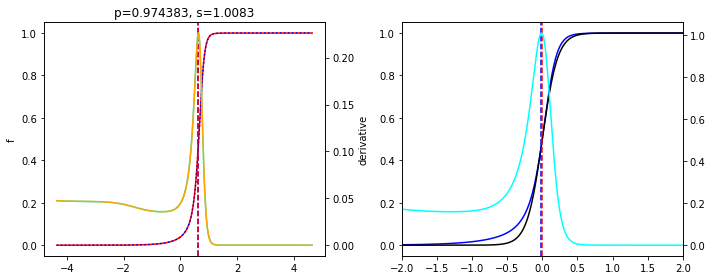

* 494 0.965317 1.02945 0.9792868191543225 1.0296152330320412
0.9792868191543225 1.0296152330320412 ; 0.9785077457344363 1.029615233031849


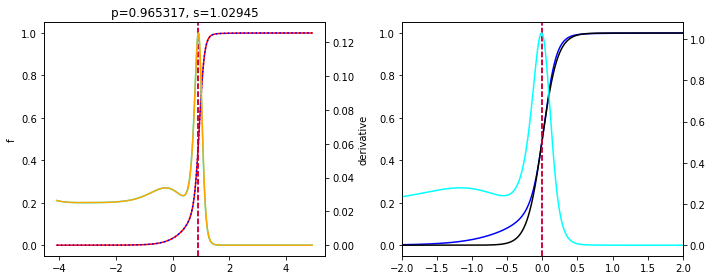

ok 0.933641 1.12219 ; 0.9267650976017097 1.1224493758943064
0.9267650976017097 1.1224493758943064 ; 0.9210236206025415 1.1224493758940552


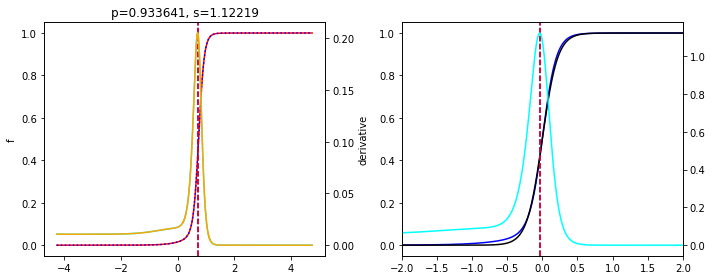

ok 0.944386 1.14796 ; 0.952269309134961 1.147873889642802
0.952269309134961 1.147873889642802 ; 0.946972805126268 1.147873889642571


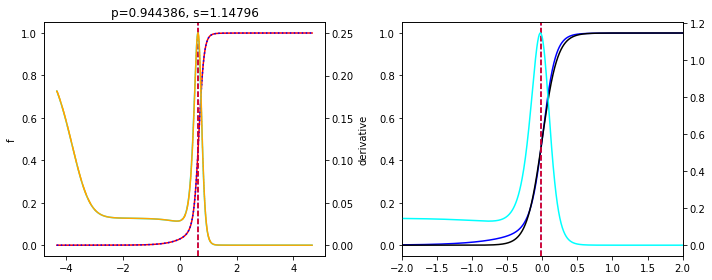

ok 1.03626 1.08404 ; 1.0332850412464176 1.0843499164628818
1.0332850412464176 1.0843499164628818 ; 1.0277926597945546 1.084349916462421


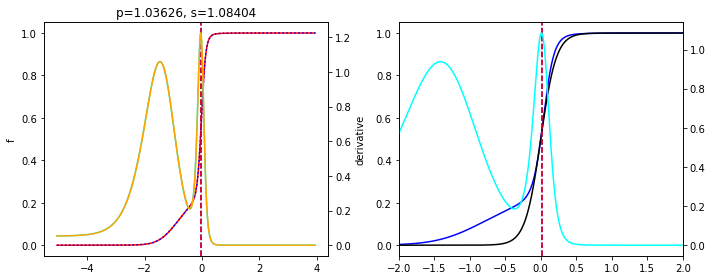

* 422 0.94241 1.08188 1.0035292034469442e-05 1.4050833215020926
1.0035292034469442e-05 1.4050833215020926 ; 1.001036710666969e-05 1.405083321501389


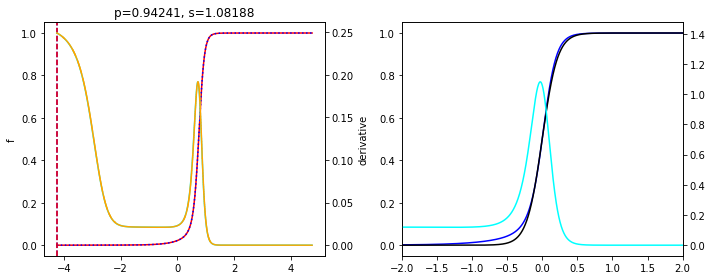

* 262 0.906942 1.02202 1.4806816854016428e-05 1.1845465203657317
1.4806816854016428e-05 1.1845465203657317 ; 1.4669019426488465e-05 1.1845465203653252


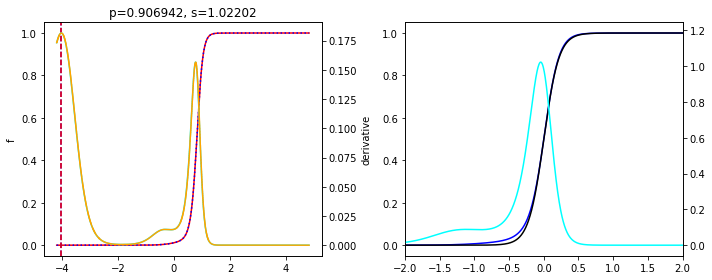

ok 1.02134 1.08454 ; 1.0249675288883857 1.0848508361151943
1.0249675288883857 1.0848508361151943 ; 1.0195141798778413 1.0848508361147136


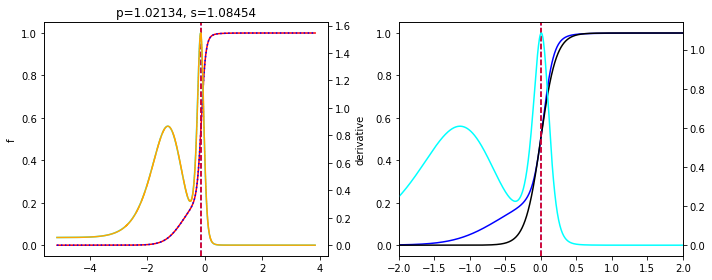

ok 0.930486 1.1317 ; 0.9208303857495973 1.1317382521663157
0.9208303857495973 1.1317382521663157 ; 0.9175943949947135 1.131738252166122


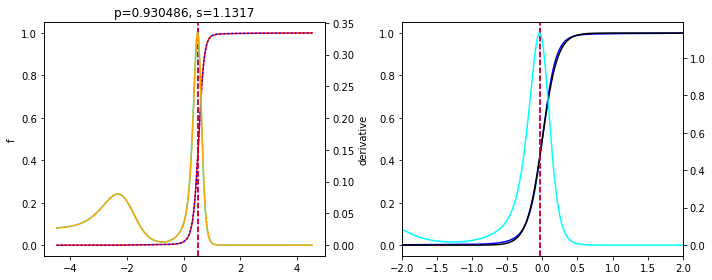

ok 0.960196 1.14961 ; 0.9594002338737527 1.150010932474771
0.9594002338737527 1.150010932474771 ; 0.9548601069918459 1.1500109324745853


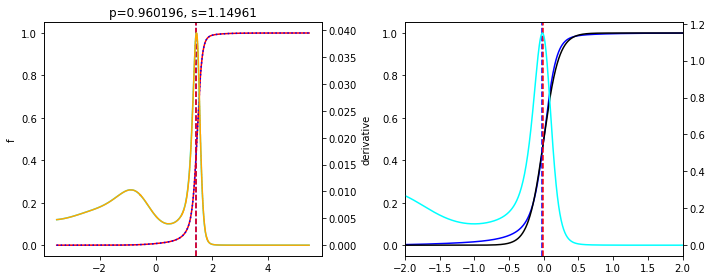

ok 0.928538 1.10009 ; 0.9231231718818178 1.1004127146407097
0.9231231718818178 1.1004127146407097 ; 0.9156947897219504 1.100412714640455


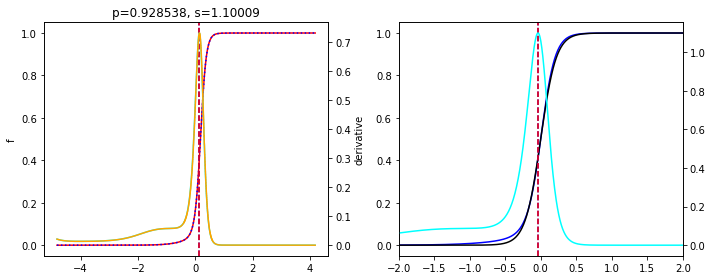

ok 0.94241 1.18799 ; 0.9463673762116305 1.188110575237183
0.9463673762116305 1.188110575237183 ; 0.9375949465540789 1.1881105752370025


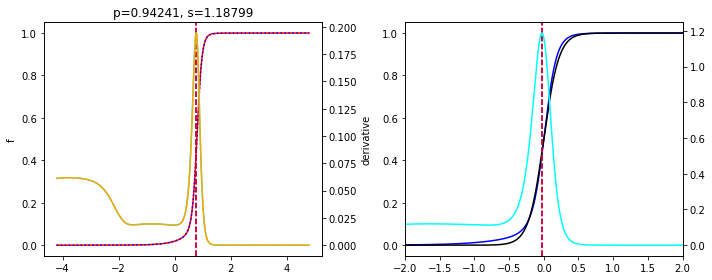

ok 0.90519 1.05902 ; 0.9119050053175308 1.059115474573683
0.9119050053175308 1.059115474573683 ; 0.9068099744910956 1.0591154745734233


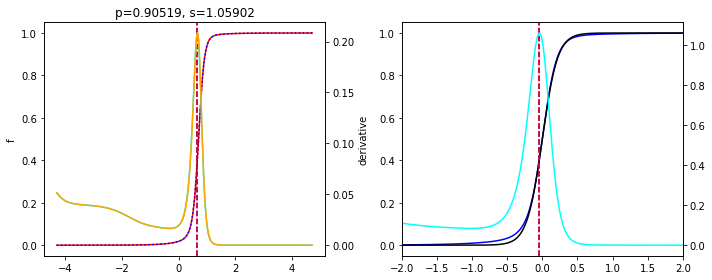

ok 1.02085 1.10515 ; 1.0275196072869504 1.1051827668751133
1.0275196072869504 1.1051827668751133 ; 1.0212109992471499 1.1051827668746759


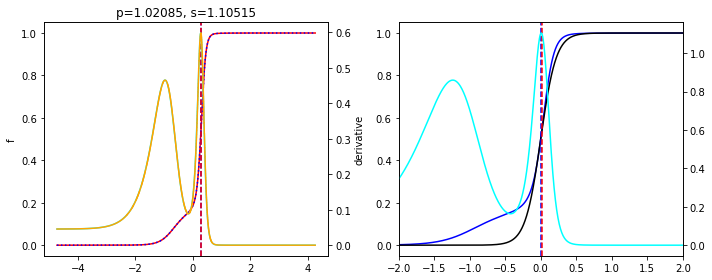

* 419 0.948505 1.05084 1.0016592528849892e-05 2.8188218986554676
1.0016592528849892e-05 2.8188218986554676 ; 1.001036710666969e-05 2.818821898649404


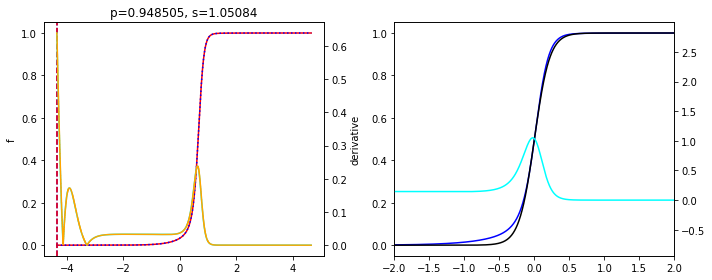

ok 0.913103 1.07442 ; 0.914175568042709 1.074442048968058
0.914175568042709 1.074442048968058 ; 0.9071905057580305 1.0744420489677815


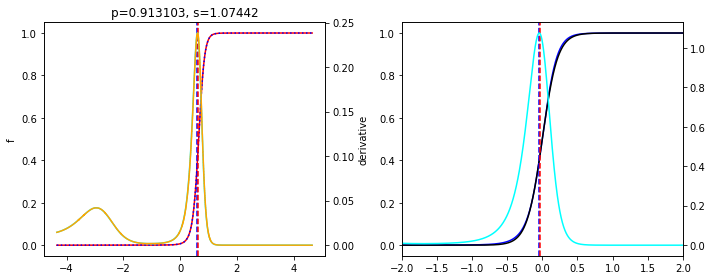

ok 1.01527 1.09689 ; 1.0120921402328156 1.0969911727593002
1.0120921402328156 1.0969911727593002 ; 1.0098364047017256 1.0969911727588209


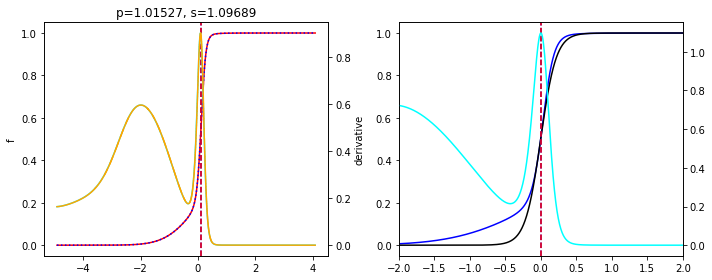

ok 1.0021 1.08098 ; 1.0060279023132577 1.0809583639260278
1.0060279023132577 1.0809583639260278 ; 0.9996288294957697 1.0809583639255316


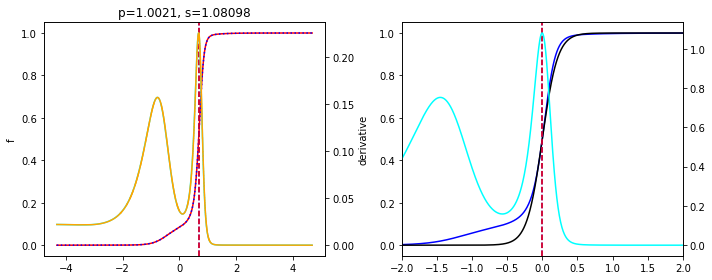

ok 0.921085 1.05468 ; 0.9229318885208367 1.0546865783085264
0.9229318885208367 1.0546865783085264 ; 0.9153106912373998 1.0546865783082526


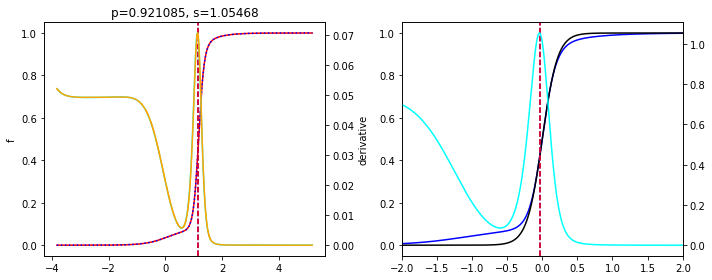

ok 0.922868 1.03853 ; 0.9233144948874623 1.0385287280156572
0.9233144948874623 1.0385287280156572 ; 0.9139838646936274 1.0385287280153725


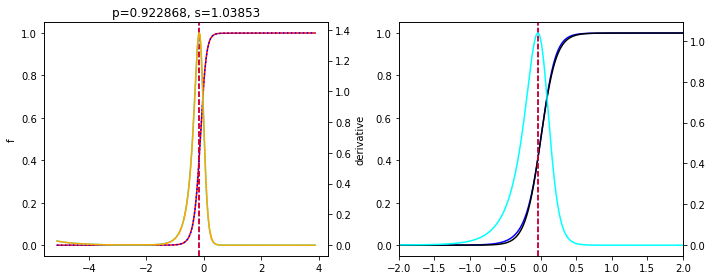

ok 0.918861 1.11523 ; 0.9139861387438822 1.1152777301815395
0.9139861387438822 1.1152777301815395 ; 0.9096378188137406 1.1152777301812766


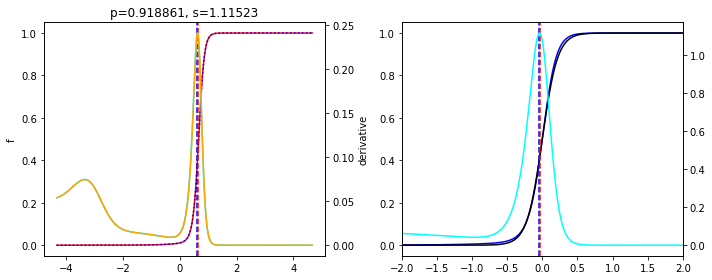

ok 1.03526 1.09517 ; 1.0330709308854586 1.0958031845705054
1.0330709308854586 1.0958031845705054 ; 1.0260901168079843 1.095803184570049


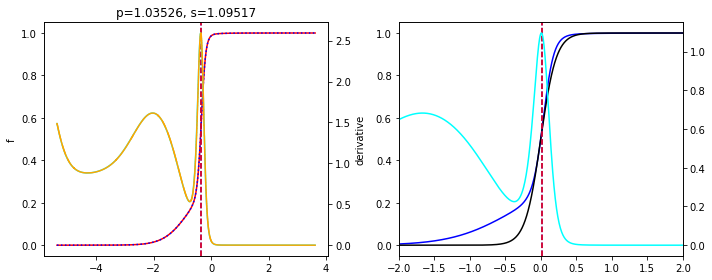

* 809 1.04735 1.09182 2.3646874024804036e-05 1.5843159023944977
2.3646874024804036e-05 1.5843159023944977 ; 2.3515099461822863e-05 1.584315902393419


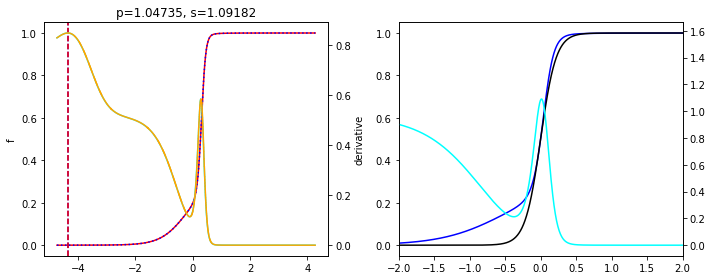

* 510 0.968434 1.17776 0.9815217301608872 1.1780636858315434
0.9815217301608872 1.1780636858315434 ; 0.9716324956747773 1.1780636858313274


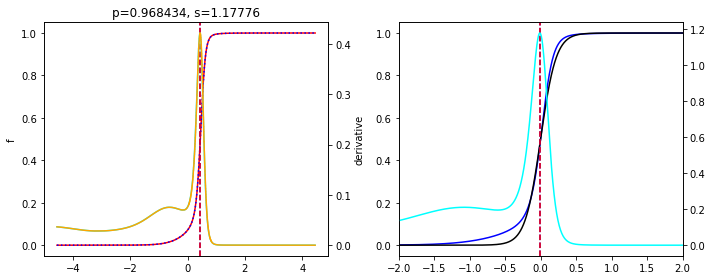

ok 0.957877 1.18224 ; 0.9671856739746657 1.1821913270892035
0.9671856739746657 1.1821913270892035 ; 0.9574360175546042 1.1821913270889879


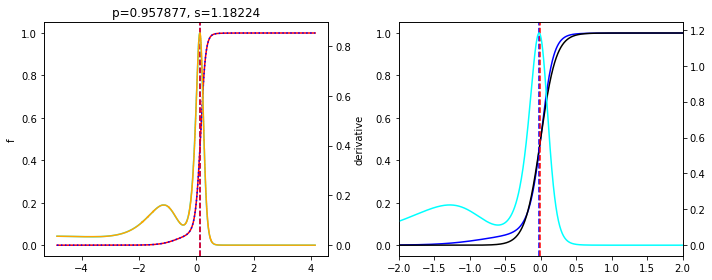

ok 1.03978 1.01773 ; 1.0403756330504657 1.0180998977286653
1.0403756330504657 1.0180998977286653 ; 1.0305705543869792 1.0180998977281925


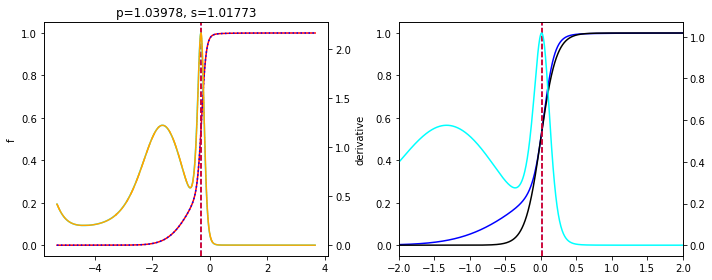

ok 0.980844 1.07568 ; 0.9860068652369891 1.0758525478333933
0.9860068652369891 1.0758525478333933 ; 0.9821696053780653 1.0758525478331493


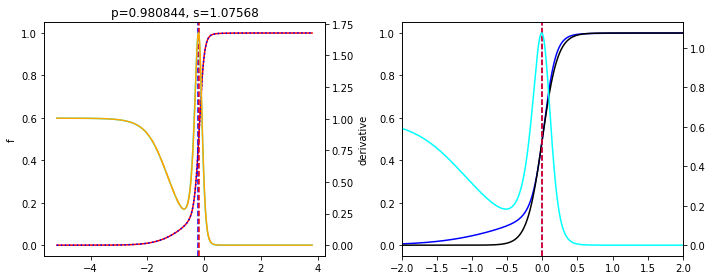

* 625 0.998389 1.1541 0.9866200604318575 1.1539187024160227
0.9866200604318575 1.1539187024160227 ; 0.979116277245705 1.1539187024158386


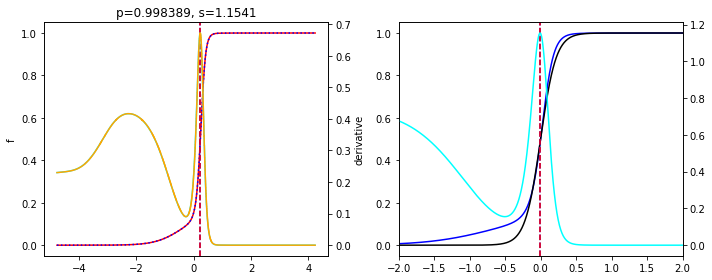

ok 1.03376 1.06571 ; 1.0334991959830773 1.066203712657379
1.0334991959830773 1.066203712657379 ; 1.0280056762010765 1.066203712656896


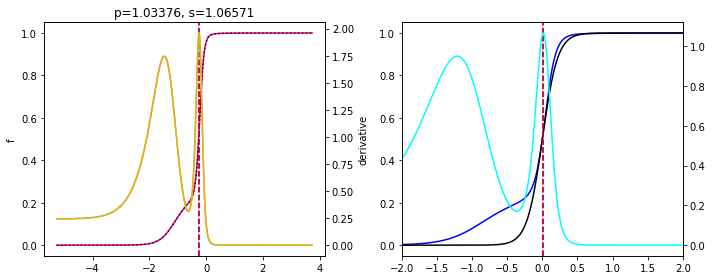

ok 0.938317 1.00305 ; 0.9319651959047189 1.0031841069197323
0.9319651959047189 1.0031841069197323 ; 0.9290797880685754 1.0031841069194585


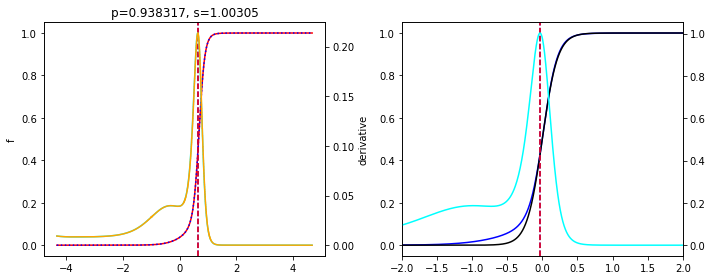

ok 0.903586 1.07391 ; 0.9117160465094044 1.0739609397435639
0.9117160465094044 1.0739609397435639 ; 0.9051202480580612 1.0739609397433496


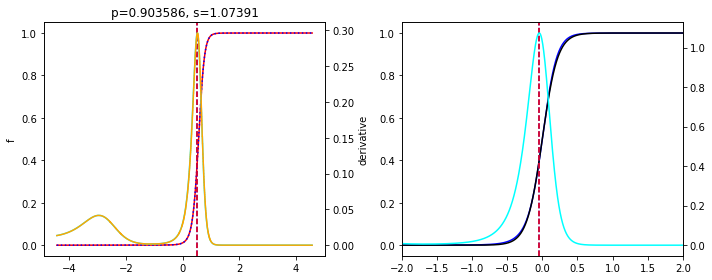

ok 0.992773 1.13449 ; 0.994420287017305 1.1347268208634527
0.994420287017305 1.1347268208634527 ; 0.989524433964363 1.1347268208632004


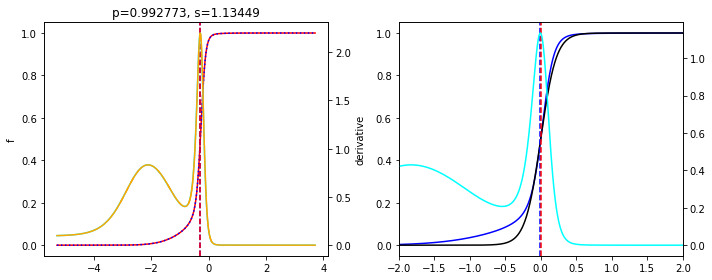

ok 1.01347 1.12977 ; 1.008532822718525 1.1304703841321786
1.008532822718525 1.1304703841321786 ; 1.0075370215843211 1.1304703841317152


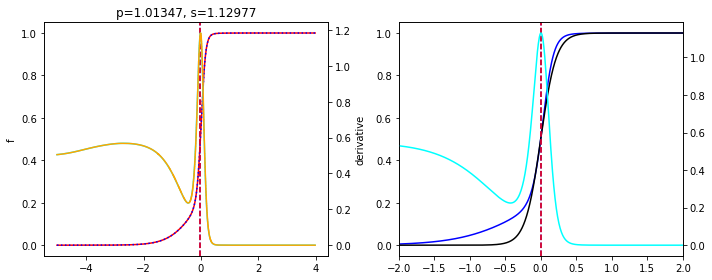

In [58]:

for idx in idxs:
    row=df.iloc[idx]
    pos=row.values[0]
    stp=row.values[1]
    if pos>0.9 and stp>1:
        parset=row.values[2:].copy()

        result=calculate_ps_fromnumerics_doublecheck_interpolate_100_widerrange(parset,n1=1000,n2=2000)

        pos2,stp2,x05,xvals,f,xint,fint=result

        if np.abs(pos2-pos)>0.01 or np.abs(stp-stp2)>0.01:
            print("*", idx, pos, stp, pos2,stp2)
        else:
            print("ok",pos,stp,";",pos2,stp2)

        log10xvals=np.log10(xvals)
        log10xint=np.log10(xint)
        hill=xint**4/(1+xint**4)

        derivative=np.diff(fint)/np.diff(xint)
        derivativeo=np.diff(f)/np.diff(xvals)
        argmax=np.argmax(np.abs(derivative))
        posnum=xint[argmax]/x05
        stpnum=derivative[argmax]*x05

        argmax2=np.argmax(np.abs(derivativeo))
        posnum2=xvals[argmax2]/x05
        stpnum2=derivativeo[argmax2]*x05

        print(posnum,stpnum,";",posnum2,stpnum2)



        fig,axes=plt.subplots(1,2,figsize=(10,4))
        ax=axes[0]
        ax.set_title("p=%g, s=%g"%(pos,stp))
        ax.plot(log10xint,fint,color="r")
        ax.plot(log10xvals,f,linestyle=":",color="b")
        ax.set_ylabel("f")

        ax2=ax.twinx()
        ax2.set_ylabel("derivative")
        ax2.plot(log10xvals[:-1],np.abs(derivativeo),color="cyan")
        ax2.plot(log10xint[:-1],np.abs(derivative),color="orange")
        ax.axvline(x=np.log10(xvals[argmax2]),color="b",linestyle="--")
        ax.axvline(x=np.log10(xint[argmax]),color="r",linestyle="--")

        ax=axes[1]
        norm_x=xvals/x05
        norm_f=f

        ax.plot(np.log10(norm_x),norm_f,color="blue")
        ax.plot(log10xint,hill,color="k")

        ax.axvline(x=np.log10(norm_x[argmax2]),color="b",linestyle="--")
        ax.axvline(x=np.log10(xint[argmax]/x05),color="r",linestyle="--")

        ax2=ax.twinx()
        ax2.plot(np.log10(norm_x[:-1]),derivativeo*x05,color="cyan")
        ax.set_xlim(-2,2)
        ax2.set_xlim(-2,2)


        plt.tight_layout()
        plt.show()

Except for a couple of cases, the calculations seem to be unchanged when using calculate_ps_fromnumerics_doublecheck_interpolate_100_widerrange


In [62]:
df.to_csv("points_noneqav4.df",index=False)